In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = np.genfromtxt('Raw Ionomics Data_F1 pop.csv',delimiter = ',')
data = pd.DataFrame(data)
plt.rcParams['figure.figsize'] = (20,10)

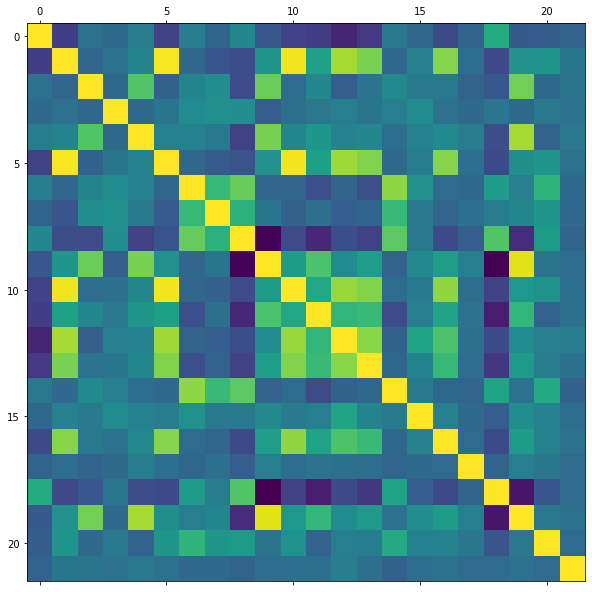

In [3]:
plt.matshow(data.corr())

In [9]:

z = pd.DataFrame(np.arange(4840).reshape(220,22))
z.shape
z

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
1,22,23,24,25,26,27,28,29,30,31,...,34,35,36,37,38,39,40,41,42,43
2,44,45,46,47,48,49,50,51,52,53,...,56,57,58,59,60,61,62,63,64,65
3,66,67,68,69,70,71,72,73,74,75,...,78,79,80,81,82,83,84,85,86,87
4,88,89,90,91,92,93,94,95,96,97,...,100,101,102,103,104,105,106,107,108,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,4730,4731,4732,4733,4734,4735,4736,4737,4738,4739,...,4742,4743,4744,4745,4746,4747,4748,4749,4750,4751
216,4752,4753,4754,4755,4756,4757,4758,4759,4760,4761,...,4764,4765,4766,4767,4768,4769,4770,4771,4772,4773
217,4774,4775,4776,4777,4778,4779,4780,4781,4782,4783,...,4786,4787,4788,4789,4790,4791,4792,4793,4794,4795
218,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805,...,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817


In [11]:
for x in range(1, data.shape[1]):
    mean = data[x].mean()
    stdev = data[x].std()
    for y in range(1, data.shape[0]):
        zscore= (data[y,x] - mean)/stdev
        z[y,x] = zscore
z

KeyError: (1, 1)